In [35]:
!pip install wordcloud
!pip install textblob

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import matplotlib.dates as dates
from wordcloud import WordCloud
from re import sub as substitute, MULTILINE,compile
from nltk.corpus import stopwords
import nltk
import warnings
from matplotlib.pyplot import pie, axis, show
from textblob import TextBlob
import itertools 


In [37]:
tweets_df=pd.read_csv("Downloads/DataSetAnnotedUsers.csv")

In [38]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1610 non-null   int64  
 1   Unnamed: 0.1      1610 non-null   int64  
 2   tweet_id          1610 non-null   int64  
 3   tweet_text        1610 non-null   object 
 4   user_id           1610 non-null   int64  
 5   name              1609 non-null   object 
 6   screen_name       1610 non-null   object 
 7   location          1610 non-null   object 
 8   description       1610 non-null   object 
 9   url               495 non-null    object 
 10  is_protected      1610 non-null   bool   
 11  followers_count   1610 non-null   int64  
 12  friends_count     1610 non-null   int64  
 13  created_at        1610 non-null   object 
 14  favourites_count  1610 non-null   int64  
 15  verified          1610 non-null   bool   
 16  statuses_count    1610 non-null   int64  


In [39]:
tweets_df.head()

,Unnamed: 0,Unnamed: 0.1,tweet_id,tweet_text,user_id,name,screen_name,location,description,url,is_protected,followers_count,friends_count,created_at,favourites_count,verified,statuses_count,Tag
0,0,0,1403373140433162244,RT @ZoroMins: just realized BH probably asked ...,53271625,Steph⁷ ∞💜,findmytime9395,she/her bi 28,The dawn before the sun rises is darker than a...,NaN,False,846,1897,03-07-2009 02:45:48,381496,False,182209,NaN
1,1,1,1403373140387020805,RT @marcuschown: 90% of the Covid cases are no...,2338811370,Clare Hepworth OBE,Hepworthclare,North East,Socialist Trade Unionist.Passionate about Hsg....,NaN,False,42867,4520,11-02-2014 18:46:43,118374,False,267458,0.0
2,2,2,1403373140269481986,RT @JoeBiden: COVID-19 vaccines are free. Get ...,1929106680,Kween Karls,karlss16,❤️J.M.W❤️,Rest Easy Duddy 💚,https://t.co/6dCendBWUb,False,320,363,03-10-2013 03:22:34,45501,False,32025,0.0
3,3,3,1403373138839285765,Smart Procurement and Industry have lost a tru...,196540632,Smart Procurement World,SmartProcure,South Africa,SA's Largest Procurement & Inbound Supply Chai...,https://t.co/OG7uZdt8yL,False,1739,624,29-09-2010 10:44:46,409,False,3402,0.0
4,4,4,1403373138113617923,"RT @0hanyy: Thank you, God! 🙏🏽💕 I am alive. Be...",1295287459425779712,Tree Climber,M___C22,⏰,None,NaN,False,901,989,17-08-2020 09:13:00,26337,False,43833,0.0


In [40]:
tweets_df['user_tag']=""
tweets_df.to_csv("DataSetAnnotedUsers.csv", index='false')
t_df=pd.read_csv("Desktop/cap project/Code/Annotated_final.csv", encoding="latin1")

count_1=0
for ann in t_df['Annotation']:
    tweets_df['user_tag'][count_1]=ann
    tweets_df.to_csv("DataSetAnnotedUsers.csv", index='false')
    count_1+=1

In [44]:
tweets_df.drop('Tag', inplace=True, axis=1)

In [45]:
tweets_df.head()

,Unnamed: 0,Unnamed: 0.1,tweet_id,tweet_text,user_id,name,screen_name,location,description,url,is_protected,followers_count,friends_count,created_at,favourites_count,verified,statuses_count,user_tag
0,0,0,1403373140433162244,RT @ZoroMins: just realized BH probably asked ...,53271625,Steph⁷ ∞💜,findmytime9395,she/her bi 28,The dawn before the sun rises is darker than a...,NaN,False,846,1897,03-07-2009 02:45:48,381496,False,182209,1
1,1,1,1403373140387020805,RT @marcuschown: 90% of the Covid cases are no...,2338811370,Clare Hepworth OBE,Hepworthclare,North East,Socialist Trade Unionist.Passionate about Hsg....,NaN,False,42867,4520,11-02-2014 18:46:43,118374,False,267458,0
2,2,2,1403373140269481986,RT @JoeBiden: COVID-19 vaccines are free. Get ...,1929106680,Kween Karls,karlss16,❤️J.M.W❤️,Rest Easy Duddy 💚,https://t.co/6dCendBWUb,False,320,363,03-10-2013 03:22:34,45501,False,32025,0
3,3,3,1403373138839285765,Smart Procurement and Industry have lost a tru...,196540632,Smart Procurement World,SmartProcure,South Africa,SA's Largest Procurement & Inbound Supply Chai...,https://t.co/OG7uZdt8yL,False,1739,624,29-09-2010 10:44:46,409,False,3402,0
4,4,4,1403373138113617923,"RT @0hanyy: Thank you, God! 🙏🏽💕 I am alive. Be...",1295287459425779712,Tree Climber,M___C22,⏰,None,NaN,False,901,989,17-08-2020 09:13:00,26337,False,43833,0


In [46]:
tweets_df.describe()

,Unnamed: 0,Unnamed: 0.1,tweet_id,user_id,followers_count,friends_count,favourites_count,statuses_count
count,1610.000000,1610.000000,1.610000e+03,1.610000e+03,1.610000e+03,1610.000000,1610.000000,1.610000e+03
mean,804.500000,804.500000,1.403373e+18,5.367765e+17,3.435226e+04,1650.019876,38373.432298,5.459054e+04
std,464.911282,464.911282,1.638520e+11,5.925240e+17,5.842192e+05,7342.771932,73366.282382,1.271220e+05
min,0.000000,0.000000,1.403373e+18,1.367531e+06,0.000000e+00,0.000000,0.000000,1.000000e+00
25%,402.250000,402.250000,1.403373e+18,3.169356e+08,1.162500e+02,206.000000,1609.250000,3.269000e+03
50%,804.500000,804.500000,1.403373e+18,3.279769e+09,4.950000e+02,583.500000,9838.500000,1.461050e+04
75%,1206.750000,1206.750000,1.403373e+18,1.194251e+18,1.933500e+03,1550.000000,38620.250000,5.071250e+04
max,1609.000000,1609.000000,1.403373e+18,1.403372e+18,2.006235e+07,271846.000000,914539.000000,2.498801e+06


In [47]:
warnings.simplefilter(action='ignore')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

url = compile(r"https?:/+[a-zA-Z0-9./]")


def text_clean(tweet_text):
    tweet_text = substitute(r'@[A-Za-z0-9]+', '', tweet_text)
    tweet_text = substitute(r'@[A-Za-zA-Z0-9]+', '', tweet_text)
    tweet_text = substitute(r'@[A-Za-z]+', '', tweet_text)
    tweet_text = substitute(r'@[-)]+', '', tweet_text)
    tweet_text = substitute(r'#', '', tweet_text)

    tweet_text = substitute(r'RT[\s]+', '', tweet_text)
    tweet_text = substitute(r'https?\/\/\S+', '', tweet_text)
    tweet_text = substitute(r'&[a-z;]+', '', tweet_text)
    tweet_text = substitute(r'[^\w\s]', '', tweet_text)
    tweet_text = substitute(r'^https?:\/\/.[\r\n]', '', tweet_text, flags=MULTILINE)

    tweet_text = tweet_text.replace(': ', '')
    tweet_text = tweet_text.replace('_', '')
    tweet_text = tweet_text.replace('\n', '')
    tweet_text = tweet_text.replace('  ', ' ')
    tweet_text = tweet_text.lower()

    tweet_text = tweet_text.split()
    tweet_text = [word for word in tweet_text if word not in stop_words]
    tweet_text = " ".join(tweet_text)

    return tweet_text

tweets_df['tweet_text']=tweets_df['tweet_text'].apply(text_clean)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Akhilesh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [48]:
tweets_df.head()

,Unnamed: 0,Unnamed: 0.1,tweet_id,tweet_text,user_id,name,screen_name,location,description,url,is_protected,followers_count,friends_count,created_at,favourites_count,verified,statuses_count,user_tag
0,0,0,1403373140433162244,realized bh probably asked armys send voice re...,53271625,Steph⁷ ∞💜,findmytime9395,she/her bi 28,The dawn before the sun rises is darker than a...,NaN,False,846,1897,03-07-2009 02:45:48,381496,False,182209,1
1,1,1,1403373140387020805,90 covid cases indiandelta variant let fing in...,2338811370,Clare Hepworth OBE,Hepworthclare,North East,Socialist Trade Unionist.Passionate about Hsg....,NaN,False,42867,4520,11-02-2014 18:46:43,118374,False,267458,0
2,2,2,1403373140269481986,covid19 vaccines free get vaccinated folks,1929106680,Kween Karls,karlss16,❤️J.M.W❤️,Rest Easy Duddy 💚,https://t.co/6dCendBWUb,False,320,363,03-10-2013 03:22:34,45501,False,32025,0
3,3,3,1403373138839285765,smart procurement industry lost true inspirati...,196540632,Smart Procurement World,SmartProcure,South Africa,SA's Largest Procurement & Inbound Supply Chai...,https://t.co/OG7uZdt8yL,False,1739,624,29-09-2010 10:44:46,409,False,3402,0
4,4,4,1403373138113617923,thank god alive beat covid 34 weeks pregnant i...,1295287459425779712,Tree Climber,M___C22,⏰,None,NaN,False,901,989,17-08-2020 09:13:00,26337,False,43833,0


In [50]:
#wordcloud
df_1=tweets_df.loc[tweets_df.user_tag==1]
df_2=tweets_df.loc[tweets_df.user_tag==0]

In [51]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 1609
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        393 non-null    int64 
 1   Unnamed: 0.1      393 non-null    int64 
 2   tweet_id          393 non-null    int64 
 3   tweet_text        393 non-null    object
 4   user_id           393 non-null    int64 
 5   name              392 non-null    object
 6   screen_name       393 non-null    object
 7   location          393 non-null    object
 8   description       393 non-null    object
 9   url               108 non-null    object
 10  is_protected      393 non-null    bool  
 11  followers_count   393 non-null    int64 
 12  friends_count     393 non-null    int64 
 13  created_at        393 non-null    object
 14  favourites_count  393 non-null    int64 
 15  verified          393 non-null    bool  
 16  statuses_count    393 non-null    int64 
 17  user_tag       

In [52]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1217 entries, 1 to 1608
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1217 non-null   int64 
 1   Unnamed: 0.1      1217 non-null   int64 
 2   tweet_id          1217 non-null   int64 
 3   tweet_text        1217 non-null   object
 4   user_id           1217 non-null   int64 
 5   name              1217 non-null   object
 6   screen_name       1217 non-null   object
 7   location          1217 non-null   object
 8   description       1217 non-null   object
 9   url               387 non-null    object
 10  is_protected      1217 non-null   bool  
 11  followers_count   1217 non-null   int64 
 12  friends_count     1217 non-null   int64 
 13  created_at        1217 non-null   object
 14  favourites_count  1217 non-null   int64 
 15  verified          1217 non-null   bool  
 16  statuses_count    1217 non-null   int64 
 17  user_tag      

In [53]:
df_1.head()

,Unnamed: 0,Unnamed: 0.1,tweet_id,tweet_text,user_id,name,screen_name,location,description,url,is_protected,followers_count,friends_count,created_at,favourites_count,verified,statuses_count,user_tag
0,0,0,1403373140433162244,realized bh probably asked armys send voice re...,53271625,Steph⁷ ∞💜,findmytime9395,she/her bi 28,The dawn before the sun rises is darker than a...,NaN,False,846,1897,03-07-2009 02:45:48,381496,False,182209,1
9,9,9,1403373137232805908,commitment responsibility respect judged hard ...,1368903078611714050,Aydin Saberian,AydinSaberian,None,Mechanical Engineer(HVAC),NaN,False,56,31,08-03-2021 12:35:18,2018,False,2055,1
12,12,12,1403373136184283136,almondtree,157020074,billshankly💙,williamshankly,None,None,NaN,False,2593,2540,18-06-2010 16:25:43,55434,False,158630,1
13,13,13,1403373136024797194,crypto advocates smart people usher new age fi...,771810098025037824,Techmeme Chatter,TechmemeChatter,San Francisco CA,This account retweets the tweets that Techmeme...,https://t.co/WkkclBShsZ,False,2699,1,02-09-2016 20:40:42,0,False,165006,1
15,15,15,1403373135488036868,creativity pioneers support fund onetime fundi...,1243502365191426049,touring artists,touringartists,Berlin,Informationsportal für international mobile Kü...,https://t.co/B0x9FRqs3z,False,278,1027,27-03-2020 11:37:29,122,False,580,1


In [54]:
df_2.head()

,Unnamed: 0,Unnamed: 0.1,tweet_id,tweet_text,user_id,name,screen_name,location,description,url,is_protected,followers_count,friends_count,created_at,favourites_count,verified,statuses_count,user_tag
1,1,1,1403373140387020805,90 covid cases indiandelta variant let fing in...,2338811370,Clare Hepworth OBE,Hepworthclare,North East,Socialist Trade Unionist.Passionate about Hsg....,NaN,False,42867,4520,11-02-2014 18:46:43,118374,False,267458,0
2,2,2,1403373140269481986,covid19 vaccines free get vaccinated folks,1929106680,Kween Karls,karlss16,❤️J.M.W❤️,Rest Easy Duddy 💚,https://t.co/6dCendBWUb,False,320,363,03-10-2013 03:22:34,45501,False,32025,0
3,3,3,1403373138839285765,smart procurement industry lost true inspirati...,196540632,Smart Procurement World,SmartProcure,South Africa,SA's Largest Procurement & Inbound Supply Chai...,https://t.co/OG7uZdt8yL,False,1739,624,29-09-2010 10:44:46,409,False,3402,0
4,4,4,1403373138113617923,thank god alive beat covid 34 weeks pregnant i...,1295287459425779712,Tree Climber,M___C22,⏰,None,NaN,False,901,989,17-08-2020 09:13:00,26337,False,43833,0
5,5,5,1403373137920593925,punjab reports 1230 new covid19 cases 2071 rec...,470299753,The Pioneer,TheDailyPioneer,None,Twitter account of India's leading independent...,https://t.co/HZJocXGNYS,False,26205,98,21-01-2012 16:23:26,127,True,89296,0


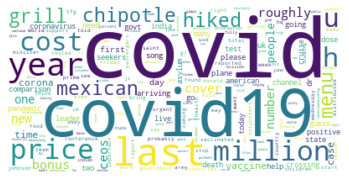

In [55]:
text1 = " ".join(title for title in df_1.tweet_text)
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text1)
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

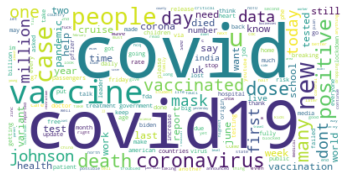

In [56]:
text2 = " ".join(title for title in df_2.tweet_text)
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text2)
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()



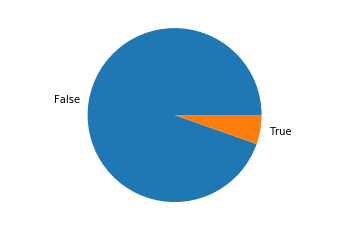

In [57]:
counts = tweets_df['verified'].value_counts()
axis('equal');
pie(counts, labels=counts.index);
show()

In [58]:
def get_tweet_sentiment(tweet):
        
       
        analysis = TextBlob(tweet)
       
        if analysis.sentiment.polarity > 0:
            return 'positive'
        elif analysis.sentiment.polarity == 0:
            return 'neutral'
        else:
            return 'negative'
        
tweets = []
for tweet in tweets_df['tweet_text']:
               
    parsed_tweet = {}
  
               
    parsed_tweet['text'] =tweet
               
    parsed_tweet['sentiment'] =get_tweet_sentiment(tweet)
    tweets.append(parsed_tweet)
    
# picking positive tweets from tweets
ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive']
    # percentage of positive tweets
print("Positive tweets percentage: {} %".format(100*len(ptweets)/len(tweets)))
    # picking negative tweets from tweets
ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative']
    # percentage of negative tweets
print("Negative tweets percentage: {} %".format(100*len(ntweets)/len(tweets)))
    # percentage of neutral tweets
print("Neutral tweets percentage: {} % \
        ".format(100*(len(tweets) -(len( ntweets )+len( ptweets)))/len(tweets)))
  
    # printing first 5 positive tweets
print("\n\nPositive tweets:")
for tweet in ptweets[:10]:
    print(tweet['text'])
  
    # printing first 5 negative tweets
print("\n\nNegative tweets:")
for tweet in ntweets[:10]:
    print(tweet['text'])
               

Positive tweets percentage: 41.24223602484472 %
Negative tweets percentage: 21.180124223602483 %
Neutral tweets percentage: 37.577639751552795 %         


Positive tweets:
covid19 vaccines free get vaccinated folks
smart procurement industry lost true inspiration heartbroken learn alex grangers passing engaging keynote addresses well remembered touched many us taken us much young covid send condolences family httpstcov76f7h8eld
thank god alive beat covid 34 weeks pregnant icu incubator delivered son 34 weeks 3 da
punjab reports 1230 new covid19 cases 2071 recoveries 59 deaths last 24 hours total cases 585986 total recoveries 555245 death toll 15435 active cases 15306 httpstcofgfvks3wqz
bbc news uk g7 summit officer staying ferry tests positive covid httpstcontpc4hasny httpstcobdqbtalymj
dont understand ontario governments decision make us took astrazeneca first dose wait 12 wee
crypto advocates smart people usher new age finance technology also went big bitco
three nurses used bin bag

In [80]:
#top 25 and least 25 users
#fake
dict_values=[]
dict_keys=[]
count=0
for uid in tweets_df['user_id']:
    try:
        fake_df=pd.read_csv('Desktop/cap project/Code/Userwisedata/' +str(uid) +'_tweets.csv')
        dict_values.append(len(fake_df.tweet_text))
        dict_keys.append(tweets_df['name'][count]) 
    except Exception:
        pass
        
    count+=1

In [82]:
len(dict_values)


1528

In [83]:
dict_1 = {}
for key in dict_keys:
    for value in dict_values:
        dict_1[key] = value
        dict_values.remove(value)
        break  

def sort_dict_by_value(d, reverse = False):
    return dict(sorted(d.items(), key = lambda x: x[1], reverse = reverse))

dict_1=sort_dict_by_value(dict_1,True)

In [84]:
f_dict = dict(itertools.islice(dict_1.items(), 25)) 
f_dict

{'The Pioneer': 3250,
 '💙 ...𝘥𝘢𝘷𝘪𝘥 𝘫𝘰𝘯𝘦𝘴 @MrDJones': 3250,
 'PA Emergency Management Agency': 3250,
 'Choco Wine': 3250,
 'Julie Martin': 3250,
 'Edward Russell': 3250,
 'N A': 3250,
 'Injury Expert': 3250,
 'Antoine FLAHAULT': 3250,
 'FaithAction': 3250,
 'Bartley Kives': 3250,
 'onalytica': 3250,
 'B101': 3250,
 'NewsRadio 920': 3250,
 'BWW Florida': 3250,
 'Er Ravi Prakash': 3250,
 'Trafford Council': 3250,
 'Eric Davis': 3250,
 'Plymouth-WM Patch': 3250,
 'Lower Moreland Patch': 3250,
 'judy gitlin': 3250,
 'EYEWITNESS NEWS': 3250,
 '🌹Rose🌹': 3250,
 'AgingWithFreedom:Lori': 3250,
 'Blackpool Gazette': 3250}

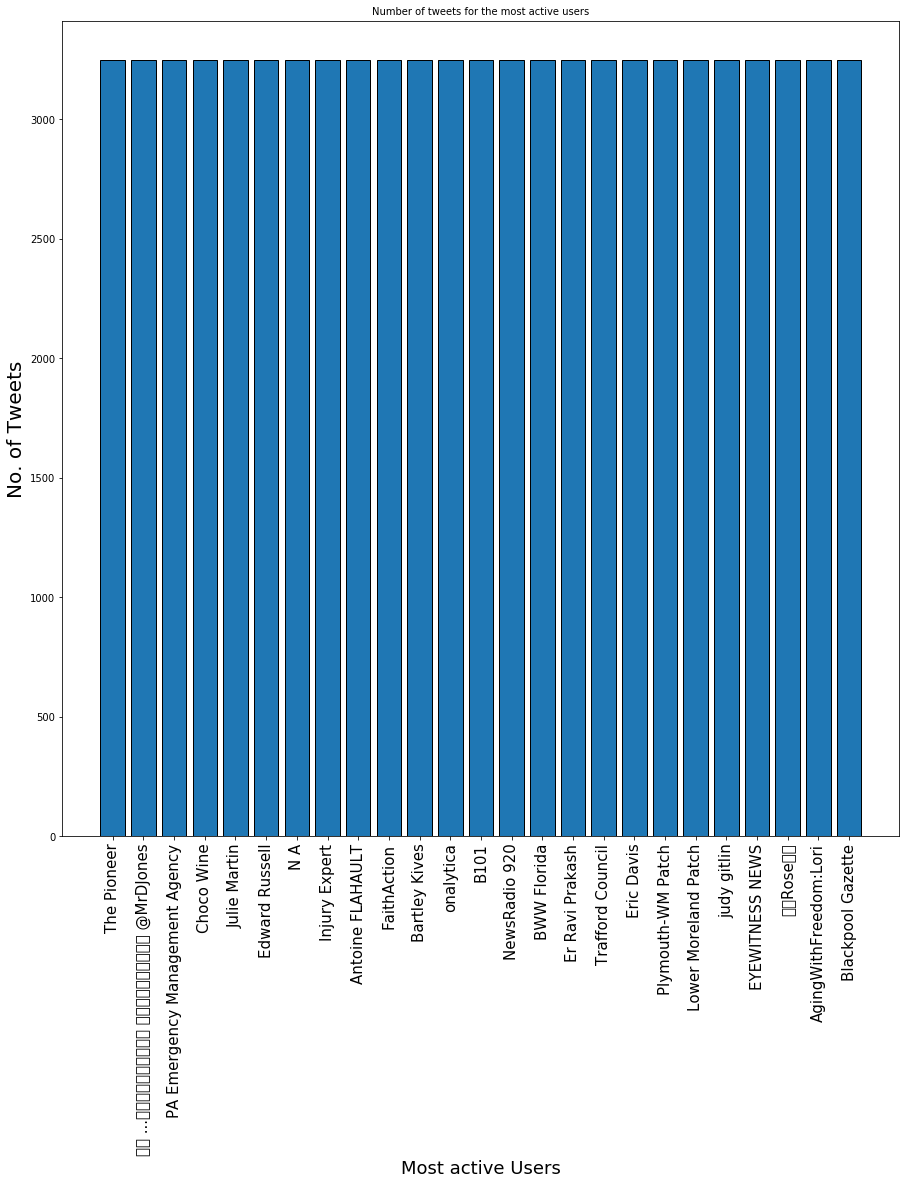

In [86]:


fig = plt.figure(figsize = (15,15))
index = np.arange(25)
plt.bar(index, f_dict.values(), edgecolor = 'black', linewidth=1)
plt.xlabel('Most active Users', fontsize =18 )   #18
plt.ylabel('No. of Tweets', fontsize=20) #20
plt.xticks(index,f_dict.keys(), fontsize=15, rotation=90)  #15
plt.title('Number of tweets for the most active users', fontsize = 10)
plt.savefig('Pictures/Tweets_of_active_users.jpg')
plt.show()

In [88]:
dict_1=sort_dict_by_value(dict_1)
l_dict = dict(itertools.islice(dict_1.items(), 25)) 
l_dict

{'Make Quotes': 1,
 'Geeta Mittal': 4,
 'Claire Price 🌈': 5,
 'PADM Medical': 11,
 'Sathwik Vodnala': 11,
 'Kabir Mishra': 14,
 'Nasir Pasha': 17,
 'Dinesh Goud': 17,
 'Daly Romain': 18,
 'Anita Gomež': 18,
 'Divyotsav Singh': 20,
 'Ankita Das': 22,
 'Patriot Jenn': 23,
 'suresh': 24,
 'Queen_Coco': 25,
 'DSIInternational': 27,
 'Alex ramirez': 28,
 'J&K Rural Livelihood Mission (Umeed) Gool Ramban.': 31,
 'Subhajit Biswas': 35,
 'Nitin Thakor': 36,
 'CleanUp': 41,
 'L. Volkmann': 46,
 'Saleem': 48,
 'Neha Roy': 53,
 'helen': 63}

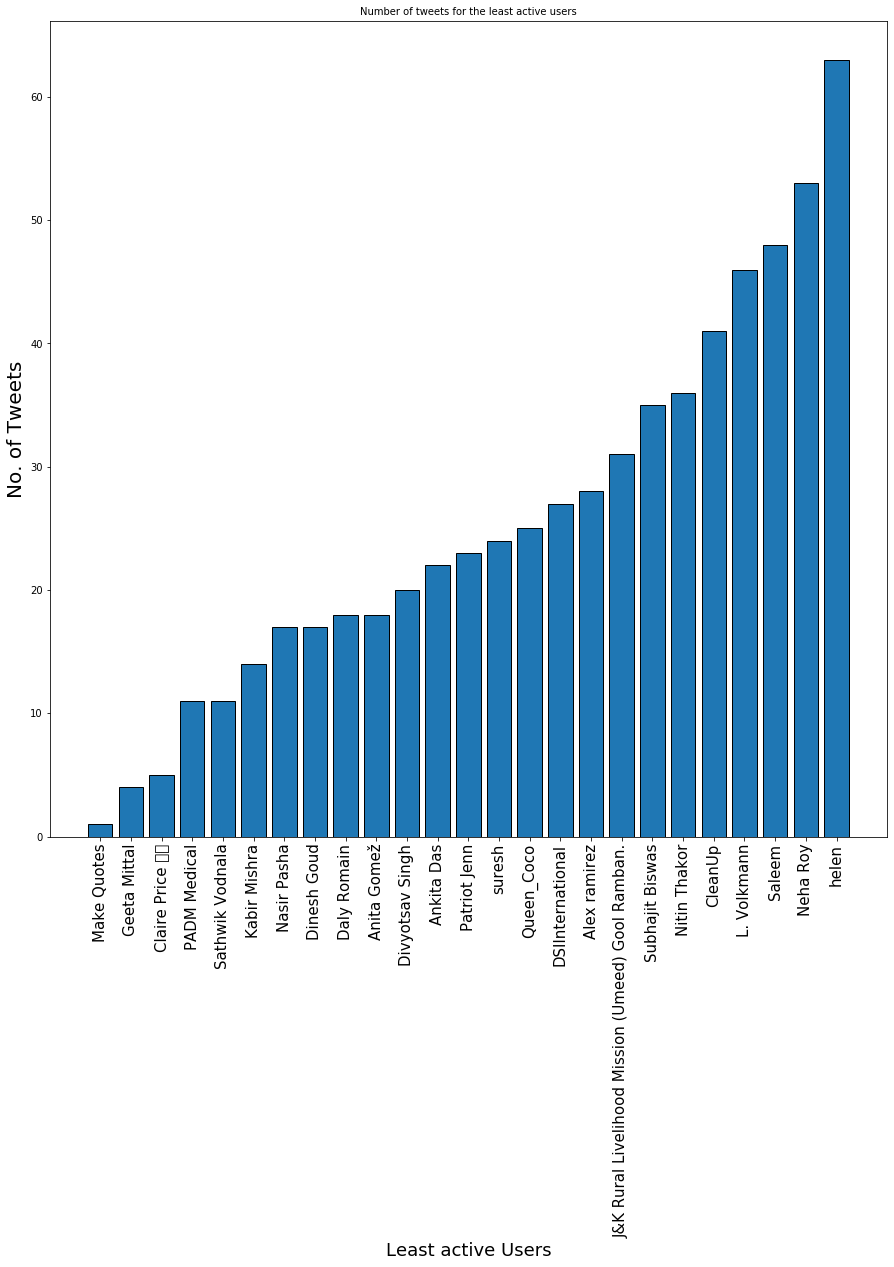

In [89]:
fig = plt.figure(figsize = (15,15))
index = np.arange(25)
plt.bar(index, l_dict.values(), edgecolor = 'black', linewidth=1)
plt.xlabel('Least active Users', fontsize =18 )   #18
plt.ylabel('No. of Tweets', fontsize=20) #20
plt.xticks(index,l_dict.keys(), fontsize=15, rotation=90)  #15
plt.title('Number of tweets for the least active users', fontsize = 10)
plt.savefig('Pictures/Tweets_of_Least_users.jpg')
plt.show()